## Loan Repayment 2016 - Predictive Modelling

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Importing the dataset 
df = pd.read_csv("Loan payments data OG plus two cols.csv") 

In [3]:
df.head() #viewing the first 5 rows 

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,19:31,Wednesday,10/07/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,09:00:00,Friday,10/07/2016,10/07/2016 09:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,16:58,Sunday,10/07/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,20:00,Thursday,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,21:36,Friday,10/08/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
#original paid off time column was parsed and dates and times were seperated in excel

In [5]:
df.shape #13 columns
         #500 rows  

(500, 13)

In [6]:
df.count() #500 row inputs   

Loan_ID                   500
loan_status               500
Principal                 500
terms                     500
effective_date            500
paid_off_time_hours       400
paid_off_time_datename    400
due_date                  500
paid_off_time             400
past_due_days             200
age                       500
education                 500
Gender                    500
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of          Loan_ID         loan_status  Principal  terms effective_date  \
0    xqd20166231             PAIDOFF       1000     30     09/08/2016   
1    xqd20168902             PAIDOFF       1000     30     09/08/2016   
2    xqd20160003             PAIDOFF       1000     30     09/08/2016   
3    xqd20160004             PAIDOFF       1000     15     09/08/2016   
4    xqd20160005             PAIDOFF       1000     30     09/09/2016   
..           ...                 ...        ...    ...            ...   
495  xqd20160496  COLLECTION_PAIDOFF       1000     30     09/12/2016   
496  xqd20160497  COLLECTION_PAIDOFF       1000     15     09/12/2016   
497  xqd20160498  COLLECTION_PAIDOFF        800     15     09/12/2016   
498  xqd20160499  COLLECTION_PAIDOFF       1000     30     09/12/2016   
499  xqd20160500  COLLECTION_PAIDOFF       1000     30     09/12/2016   

    paid_off_time_hours paid_off_time_datename    due_date     paid_off_time  \
0          

In [8]:
df.isnull().sum() 
#paid_off_time date and hours    100 nulls
#past_due_date name and month    100 nulls
#paid off time                   100nulls
#300 in past due days - blanks could represent 0 days

Loan_ID                     0
loan_status                 0
Principal                   0
terms                       0
effective_date              0
paid_off_time_hours       100
paid_off_time_datename    100
due_date                    0
paid_off_time             100
past_due_days             300
age                         0
education                   0
Gender                      0
dtype: int64

In [9]:
df.describe() #mean age in the dataset is 31 years old
              #mean repayment time is 24 days 

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [10]:
df.dtypes #types of cols

Loan_ID                    object
loan_status                object
Principal                   int64
terms                       int64
effective_date             object
paid_off_time_hours        object
paid_off_time_datename     object
due_date                   object
paid_off_time              object
past_due_days             float64
age                         int64
education                  object
Gender                     object
dtype: object

In [11]:
df.nunique() 
#loan_status         3
#Principal           6
#terms               3
#effective_date      7
#education           4 

Loan_ID                   500
loan_status                 3
Principal                   6
terms                       3
effective_date              7
paid_off_time_hours       264
paid_off_time_datename      7
due_date                   25
paid_off_time             320
past_due_days              33
age                        33
education                   4
Gender                      2
dtype: int64

In [12]:
df['loan_status'].unique()
#PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF' 

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [13]:
df['education'].unique() 
#'High School or Below', 'Bechalor', 'college', 'Master or Above' 

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [14]:
df.head() #Viewing the first 5 rows of the altered DF 

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,19:31,Wednesday,10/07/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,09:00:00,Friday,10/07/2016,10/07/2016 09:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,16:58,Sunday,10/07/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,20:00,Thursday,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,21:36,Friday,10/08/2016,9/23/2016 21:36,NaN,28,college,female


In [15]:
df['past_due_days'].fillna(0, inplace=True)  
#Replacing the NaN's with 0 in the dataframe
#Assuming no input means 0 days taken to repay  

In [16]:
#Paid off times days months nulls will be kept in the dataset as imputing may not be reflective / representative
#May actually skew the data

In [17]:
df.head() #viewing NaN alteration to zeros

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,19:31,Wednesday,10/07/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,09:00:00,Friday,10/07/2016,10/07/2016 09:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,16:58,Sunday,10/07/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,20:00,Thursday,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,21:36,Friday,10/08/2016,9/23/2016 21:36,0.0,28,college,female


In [18]:
df['due_date']= pd.to_datetime(df['due_date']) #fomatting to datetime 

In [19]:
#Altering the Date columns to have hours/days/months

In [20]:
#Altering the Date columns to have weekday name
df['Due_Date_Day'] = df['due_date'].dt.day_name() 
df  

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,19:31,Wednesday,2016-10-07,9/14/2016 19:31,0.0,45,High School or Below,male,Friday
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,09:00:00,Friday,2016-10-07,10/07/2016 09:00,0.0,50,Bechalor,female,Friday
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,16:58,Sunday,2016-10-07,9/25/2016 16:58,0.0,33,Bechalor,female,Friday
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,20:00,Thursday,2016-09-22,9/22/2016 20:00,0.0,27,college,male,Thursday
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,21:36,Friday,2016-10-08,9/23/2016 21:36,0.0,28,college,female,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,09/12/2016,19:08,Friday,2016-10-11,10/14/2016 19:08,3.0,28,High School or Below,male,Tuesday
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,09/12/2016,20:02:00,Monday,2016-09-26,10/10/2016 20:02,14.0,26,High School or Below,male,Monday
497,xqd20160498,COLLECTION_PAIDOFF,800,15,09/12/2016,11:49,Thursday,2016-09-26,9/29/2016 11:49,3.0,30,college,male,Monday
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,09/12/2016,22:40:00,Friday,2016-11-10,11/11/2016 22:40,1.0,38,college,female,Thursday


In [21]:
#formatting
df['paid_off_time']= pd.to_datetime(df['paid_off_time']) #formatting to datetime so it is useable 

In [22]:
df['paid_off_time_month'] = df['paid_off_time'].dt.month_name() 
df #month date  

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,09/12/2016,19:08,Friday,2016-10-11,2016-10-14 19:08:00,3.0,28,High School or Below,male,Tuesday,October
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,09/12/2016,20:02:00,Monday,2016-09-26,2016-10-10 20:02:00,14.0,26,High School or Below,male,Monday,October
497,xqd20160498,COLLECTION_PAIDOFF,800,15,09/12/2016,11:49,Thursday,2016-09-26,2016-09-29 11:49:00,3.0,30,college,male,Monday,September
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,09/12/2016,22:40:00,Friday,2016-11-10,2016-11-11 22:40:00,1.0,38,college,female,Thursday,November


In [23]:
#Altering the Date columns to have Month name
df['Due_Date_Month'] = df['due_date'].dt.month_name() 
df 

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,09/12/2016,19:08,Friday,2016-10-11,2016-10-14 19:08:00,3.0,28,High School or Below,male,Tuesday,October,October
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,09/12/2016,20:02:00,Monday,2016-09-26,2016-10-10 20:02:00,14.0,26,High School or Below,male,Monday,October,September
497,xqd20160498,COLLECTION_PAIDOFF,800,15,09/12/2016,11:49,Thursday,2016-09-26,2016-09-29 11:49:00,3.0,30,college,male,Monday,September,September
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,09/12/2016,22:40:00,Friday,2016-11-10,2016-11-11 22:40:00,1.0,38,college,female,Thursday,November,November


In [24]:
#We can drop the due_date column now

In [25]:
df['effective_date']= pd.to_datetime(df['effective_date']) #formatting 

In [26]:
df['paid_off_time_day'] = df['paid_off_time'] - df['effective_date']
df #days 

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September,14 days 20:00:00
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October,14 days 21:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,2016-09-12,19:08,Friday,2016-10-11,2016-10-14 19:08:00,3.0,28,High School or Below,male,Tuesday,October,October,32 days 19:08:00
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,2016-09-12,20:02:00,Monday,2016-09-26,2016-10-10 20:02:00,14.0,26,High School or Below,male,Monday,October,September,28 days 20:02:00
497,xqd20160498,COLLECTION_PAIDOFF,800,15,2016-09-12,11:49,Thursday,2016-09-26,2016-09-29 11:49:00,3.0,30,college,male,Monday,September,September,17 days 11:49:00
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,2016-09-12,22:40:00,Friday,2016-11-10,2016-11-11 22:40:00,1.0,38,college,female,Thursday,November,November,60 days 22:40:00


In [27]:
#formatting to generate month name col
df['Effective_date_Month'] = df['effective_date'].dt.month_name() 
df 

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,2016-09-12,19:08,Friday,2016-10-11,2016-10-14 19:08:00,3.0,28,High School or Below,male,Tuesday,October,October,32 days 19:08:00,September
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,2016-09-12,20:02:00,Monday,2016-09-26,2016-10-10 20:02:00,14.0,26,High School or Below,male,Monday,October,September,28 days 20:02:00,September
497,xqd20160498,COLLECTION_PAIDOFF,800,15,2016-09-12,11:49,Thursday,2016-09-26,2016-09-29 11:49:00,3.0,30,college,male,Monday,September,September,17 days 11:49:00,September
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,2016-09-12,22:40:00,Friday,2016-11-10,2016-11-11 22:40:00,1.0,38,college,female,Thursday,November,November,60 days 22:40:00,September


In [28]:
df['Effective_date_Day'] = df['effective_date'].dt.day_name() 
df  #formatting so the day name is obtained

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September,Thursday
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September,Thursday
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September,Thursday
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September,Thursday
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,2016-09-12,19:08,Friday,2016-10-11,2016-10-14 19:08:00,3.0,28,High School or Below,male,Tuesday,October,October,32 days 19:08:00,September,Monday
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,2016-09-12,20:02:00,Monday,2016-09-26,2016-10-10 20:02:00,14.0,26,High School or Below,male,Monday,October,September,28 days 20:02:00,September,Monday
497,xqd20160498,COLLECTION_PAIDOFF,800,15,2016-09-12,11:49,Thursday,2016-09-26,2016-09-29 11:49:00,3.0,30,college,male,Monday,September,September,17 days 11:49:00,September,Monday
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,2016-09-12,22:40:00,Friday,2016-11-10,2016-11-11 22:40:00,1.0,38,college,female,Thursday,November,November,60 days 22:40:00,September,Monday


In [29]:
#formatting
df['paid_off_time']= pd.to_datetime(df['paid_off_time']) #formatting to datetime so it is useable

In [30]:
#viewing the alterations made
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September,Thursday
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September,Thursday
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September,Thursday
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September,Thursday
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September,Friday


In [31]:
df['Repayment_Time'] = (df['due_date'] - df['effective_date']).dt.days 
df  
#Using .dt.days function to remove the word 'days' at the end of the repayment column input

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day,Repayment_Time
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September,Thursday,29
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September,Thursday,29
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September,Thursday,29
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September,Thursday,14
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September,Friday,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,2016-09-12,19:08,Friday,2016-10-11,2016-10-14 19:08:00,3.0,28,High School or Below,male,Tuesday,October,October,32 days 19:08:00,September,Monday,29
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,2016-09-12,20:02:00,Monday,2016-09-26,2016-10-10 20:02:00,14.0,26,High School or Below,male,Monday,October,September,28 days 20:02:00,September,Monday,14
497,xqd20160498,COLLECTION_PAIDOFF,800,15,2016-09-12,11:49,Thursday,2016-09-26,2016-09-29 11:49:00,3.0,30,college,male,Monday,September,September,17 days 11:49:00,September,Monday,14
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,2016-09-12,22:40:00,Friday,2016-11-10,2016-11-11 22:40:00,1.0,38,college,female,Thursday,November,November,60 days 22:40:00,September,Monday,59


In [32]:
df['paid_off_time'].min()  #finding out the first instance of paid_off_time

Timestamp('2016-09-09 13:45:00')

In [33]:
df['age'].astype(float)  #changing the age type to float so it can be used in visuals

0      45.0
1      50.0
2      33.0
3      27.0
4      28.0
       ... 
495    28.0
496    26.0
497    30.0
498    38.0
499    28.0
Name: age, Length: 500, dtype: float64

In [34]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,paid_off_time_hours,paid_off_time_datename,due_date,paid_off_time,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day,Repayment_Time
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,19:31,Wednesday,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September,Thursday,29
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,09:00:00,Friday,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September,Thursday,29
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,16:58,Sunday,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September,Thursday,29
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,20:00,Thursday,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September,Thursday,14
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,21:36,Friday,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September,Friday,29


In [35]:
df.shape #20 columns - we can now drop some columns

(500, 20)

In [36]:
df = df.drop('Loan_ID', axis=1) #axis=1 identifies that it is in the column position  

In [37]:
#Can now drop the columns that are not needed 
df = df.drop('effective_date', axis=1) #axis=1 identifies that it is in the column position

In [38]:
df = df.drop('due_date', axis=1) #dropping due date column

In [39]:
df = df.drop('paid_off_time', axis=1) #dropping the paid off time column

In [40]:
df.head() #viewing the final dataframe that has been cleaned

,loan_status,Principal,terms,paid_off_time_hours,paid_off_time_datename,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day,Repayment_Time
0,PAIDOFF,1000,30,19:31,Wednesday,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September,Thursday,29
1,PAIDOFF,1000,30,09:00:00,Friday,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September,Thursday,29
2,PAIDOFF,1000,30,16:58,Sunday,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September,Thursday,29
3,PAIDOFF,1000,15,20:00,Thursday,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September,Thursday,14
4,PAIDOFF,1000,30,21:36,Friday,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September,Friday,29


In [41]:
df.shape #final cleaned dataframe has 500 rows and 16 columns after dropping

(500, 16)

In [42]:
#exporting the csv
df.to_csv('Loans data edited.csv')  

### Visulisations with Seaborn 

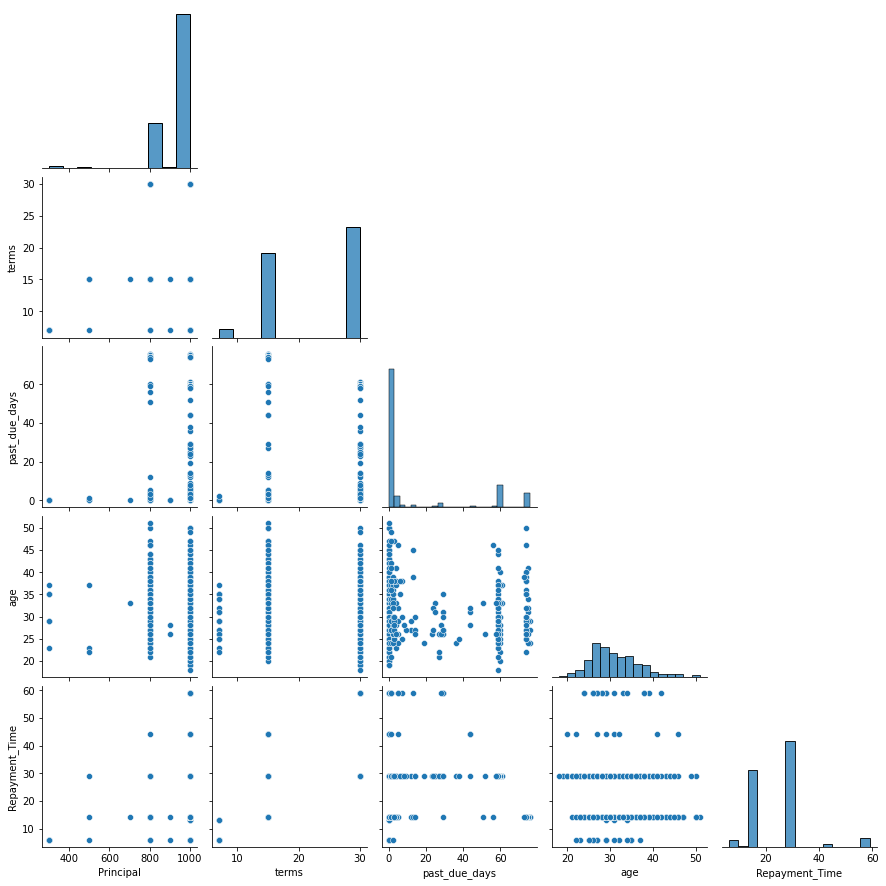

In [43]:
#PairPlot
sns.pairplot(data=df, corner=True); 

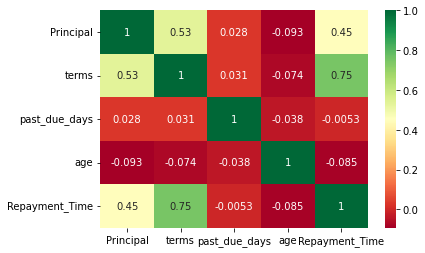

In [44]:
#HeatMap
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn"); 
#increasing fig size  
#terms and principal have the strongest correlations
#terms and repayment time also has a strong correlation

In [45]:
df['age'].value_counts() #viewing the most common age to take out a loan 

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
32    20
25    20
37    19
38    19
36    14
23    10
39    10
40     8
22     8
21     7
41     5
46     5
45     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
18     1
49     1
Name: age, dtype: int64

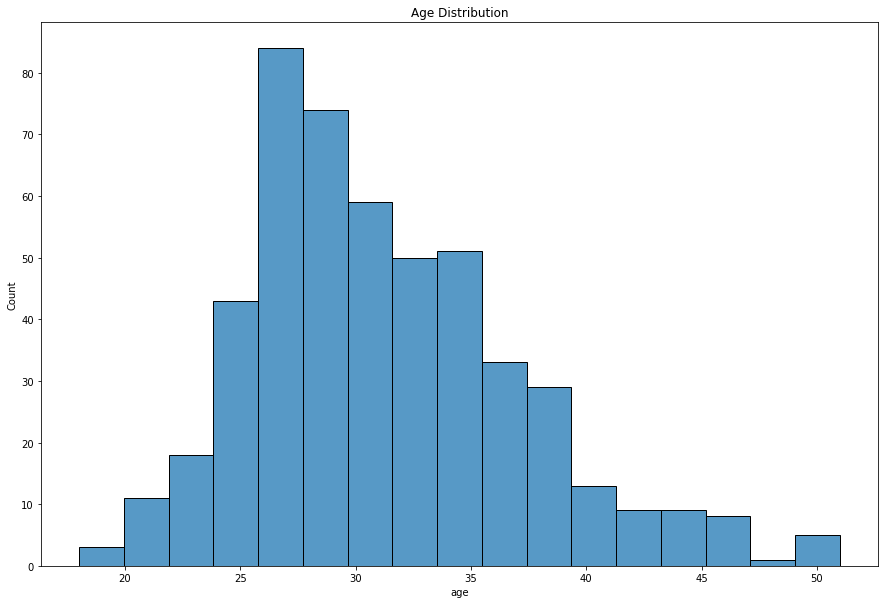

In [46]:
#Age distribution - Hist Plot
plt.figure(figsize=(15,10))  
sns.histplot(data=df, x='age').set(title='Age Distribution'); 
#Most common ages to take out a loan in 2016 is from the ages of 26-30
#26 year olds being the most likely to take out a loan
 


In [47]:
df['age'].max() 

51

In [48]:
gender = df.value_counts('Gender') 
gender 


Gender
male      423
female     77
dtype: int64

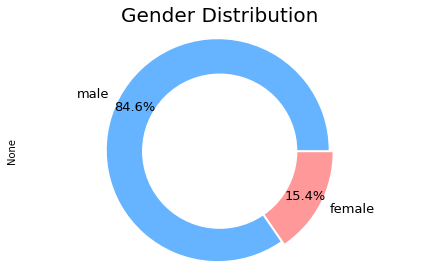

In [49]:
#Gender Split - Doughnut Chart
explode=[0.02,0.02]
colors = ['#66b3ff','#ff9999']
px = gender.plot(kind='pie', autopct='%1.1f%%',shadow=False, startangle=0, fontsize=13, explode=explode, colors=colors, pctdistance=0.85)
px.set_title('Gender Distribution', fontsize=20)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
px.axis('equal')
plt.tight_layout() 
plt.show()  

In [50]:
df['education'].value_counts()  
#3 - High school or below
#2 - Masters and above
#1 - College 
#0 Bachelors

college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: education, dtype: int64

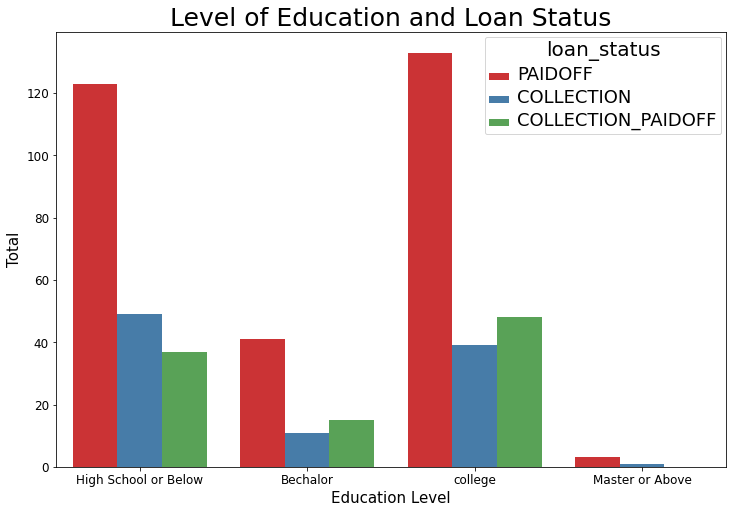

In [51]:
# plotting loan_staus with respect to Education
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='education',hue='loan_status', palette='Set1') 
ax.set_xlabel("Education Level",fontsize=15)
ax.set_ylabel("Total",fontsize=15)  
ax.tick_params(labelsize=12)    
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='20')
ax.set_title("Level of Education and Loan Status", fontsize=25);  

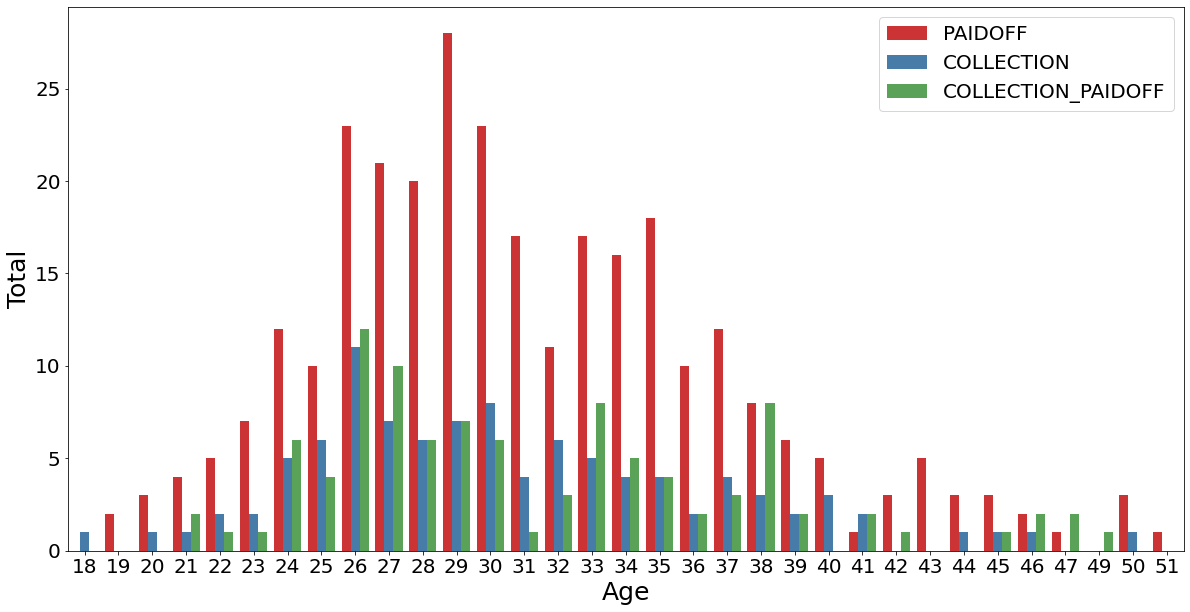

In [52]:
plt.figure(figsize=(20,10))
op = sns.countplot(data=df, x='age',hue='loan_status', palette='Set1')
op.set_xlabel("Age",fontsize=25)
op.set_ylabel("Total",fontsize=25) 
plt.legend(loc='upper right', fontsize=20) 
op.tick_params(labelsize=20);    
#Most people have paid off their loans
#26-29 year olds being the most reliable
#min age required to take out a loan is 18 years old
#no one older than 51 took out a loan in this 2016 dataset


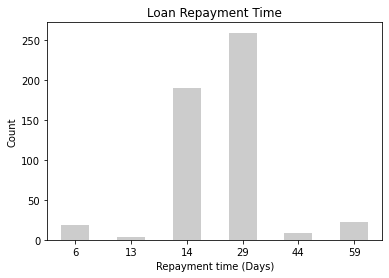

In [53]:
df.groupby(['Repayment_Time']).size().plot(kind = "bar", color='0.8') 
plt.xticks(rotation=0)
plt.title('Loan Repayment Time') 
plt.xlabel('Repayment time (Days)')
plt.ylabel('Count'); 
#29 days for the repayment time most common
#little as 6 days to pay to 59 days to pay 

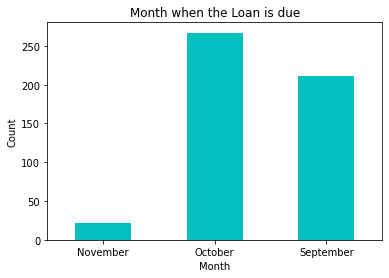

In [54]:
df.groupby(['Due_Date_Month']).size().plot(kind = "bar", color='c') 
plt.xticks(rotation=0)
plt.title('Month when the Loan is due') 
plt.xlabel('Month')
plt.ylabel('Count');   
#October is the month when the loans are due
#There are only 3 months - sept, oct, novemeber

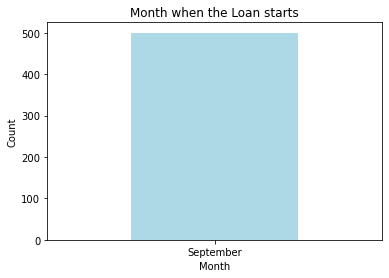

In [55]:
df.groupby(['Effective_date_Month']).size().plot(kind = "bar", color='lightblue')  
plt.xticks(rotation=0)
plt.title('Month when the Loan starts') 
plt.xlabel('Month')
plt.ylabel('Count');  
#All loans are given in September 

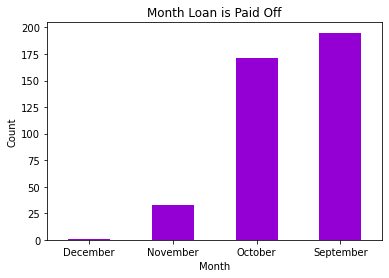

In [56]:
df.groupby(['paid_off_time_month']).size().plot(kind = "bar", color='darkviolet')  
plt.xticks(rotation=0)
plt.title('Month Loan is Paid Off') 
plt.xlabel('Month')
plt.ylabel('Count');  
#Loans are paid off mainly in September from 2016 dataset

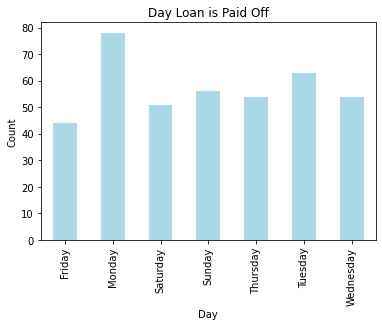

In [57]:
df.groupby(['paid_off_time_datename']).size().plot(kind = "bar", color='lightblue')
plt.title('Day Loan is Paid Off') 
plt.xlabel('Day')   
plt.ylabel('Count');  
#Monday most likely for loan to be paid off

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


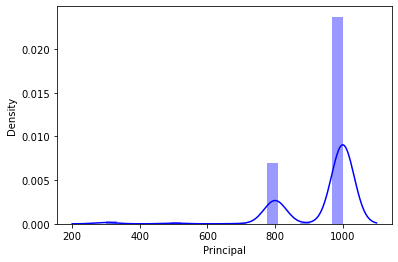

In [58]:
sns.distplot(df.Principal, color='b');
#Basic principal loan amount at the origination 
#Most people took out a loan of £1000 

In [59]:
df['Principal'].value_counts() 

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

## Train-Test-Split

In [60]:
df.head() #Viewing the data types in order to determine which columns to label encode

,loan_status,Principal,terms,paid_off_time_hours,paid_off_time_datename,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day,Repayment_Time
0,PAIDOFF,1000,30,19:31,Wednesday,0.0,45,High School or Below,male,Friday,September,October,6 days 19:31:00,September,Thursday,29
1,PAIDOFF,1000,30,09:00:00,Friday,0.0,50,Bechalor,female,Friday,October,October,29 days 09:00:00,September,Thursday,29
2,PAIDOFF,1000,30,16:58,Sunday,0.0,33,Bechalor,female,Friday,September,October,17 days 16:58:00,September,Thursday,29
3,PAIDOFF,1000,15,20:00,Thursday,0.0,27,college,male,Thursday,September,September,14 days 20:00:00,September,Thursday,14
4,PAIDOFF,1000,30,21:36,Friday,0.0,28,college,female,Saturday,September,October,14 days 21:36:00,September,Friday,29


In [61]:
#Label Encoding - selecting only the necessary columns 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cols = ['loan_status', 'paid_off_time_hours', 'paid_off_time_datename', 'education', 'Gender', 'Due_Date_Day', 'paid_off_time_month', 'Due_Date_Month', 'Effective_date_Month', 'Effective_date_Day']
le = LabelEncoder() 
for col in cols: 
    df[col] = le.fit_transform(df[col])    #transforming all the selected categorical columns

In [62]:
df.head() #viewing the altered dataframe

,loan_status,Principal,terms,paid_off_time_hours,paid_off_time_datename,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day,Repayment_Time
0,2,1000,30,217,6,0.0,45,1,1,0,3,1,6 days 19:31:00,0,4,29
1,2,1000,30,31,0,0.0,50,0,0,0,2,1,29 days 09:00:00,0,4,29
2,2,1000,30,185,3,0.0,33,0,0,0,3,1,17 days 16:58:00,0,4,29
3,2,1000,15,221,4,0.0,27,3,1,4,3,2,14 days 20:00:00,0,4,14
4,2,1000,30,241,0,0.0,28,3,0,2,3,1,14 days 21:36:00,0,0,29


In [63]:
# Splitting information into dependent independent (X, y)
# function: train_test_split / 80% training and 20% testing
# random state = 42

X = df.drop(columns=['loan_status'], axis=1)  #all columns apart from target variable
y = df['loan_status']                         #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     Principal  terms  paid_off_time_hours  paid_off_time_datename  \
 249       1000     15                   10                       1   
 433       1000     30                  133                       6   
 19         800     30                   21                       0   
 322       1000     30                  264                       7   
 332       1000     30                  264                       7   
 ..         ...    ...                  ...                     ...   
 106       1000     30                  192                       2   
 270       1000     30                   62                       0   
 348       1000     30                  264                       7   
 435       1000     30                  174                       5   
 102       1000     30                  166                       1   
 
      past_due_days  age  education  Gender  Due_Date_Day  paid_off_time_month  \
 249            0.0   35          0       0             5       

In [64]:
#df_test['loan_status']= pd.DataFrame(np.where(df_test['loan_status']=='PAIDOFF',1, 0))

In [65]:
#Selecting which factors affect the loan status (target variable) the most:

#Principal
#Terms
#age 
#Education
#Gender
#Repayment_Time 

In [66]:
#X = df[['Principal', 'terms', 'age', 'education', 'Gender', 'Repayment_Time']]#feature selection
#Originally I had selected these columns specifically however these generated low scores in report

In [67]:
#Balancing Target Variable
#pip install imblearn
!pip install imblearn 
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE 


Defaulting to user installation because normal site-packages is not writeable


In [68]:
weights = [i for i in df['loan_status'].value_counts(normalize=True)]
weights 

[0.6, 0.2, 0.2]

In [69]:
df.shape

(500, 16)

In [70]:
#Defining the dataset
X, y = make_classification(n_samples=1000, weights=weights, n_classes=3, n_redundant=0, n_informative=2,
                        n_clusters_per_class=1)    
print(Counter(y))   

Counter({0: 598, 2: 203, 1: 199})


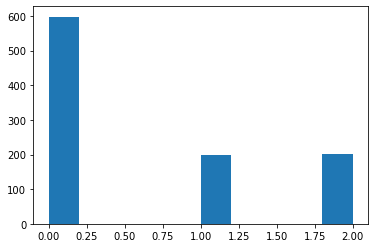

In [71]:
plt.hist(y); 

In [72]:
#Transforming the dataset
smote1 = SMOTE() 
X_over, y_over = smote1.fit_resample(X,y)
print(Counter(y_over))  

Counter({1: 598, 0: 598, 2: 598})


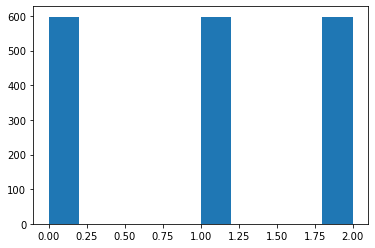

In [73]:
plt.hist(y_over); 
#The target variable column is now balanced

In [74]:
X_over.shape, X_test.shape, y_over.shape, y_test.shape 

((1794, 20), (100, 15), (1794,), (100,))

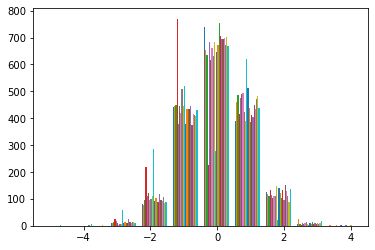

In [75]:
plt.hist(X_over); #visualising distribution of the X

#### KNN 

In [76]:
classifier = KNeighborsClassifier(n_neighbors=11, p=3, metric='euclidean') 
classifier 
#p value indicates two options

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=3)

In [77]:
# Train model
classifier.fit(X_over, y_over)   

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=3)

In [78]:
#collecting the predictions
y_pred_knn = classifier.predict(X_over) 
y_pred_knn, y_test    

(array([1, 0, 0, ..., 2, 2, 2]),
 361    0
 73     2
 374    0
 155    2
 104    2
       ..
 347    0
 86     2
 75     2
 438    1
 15     2
 Name: loan_status, Length: 100, dtype: int32)

In [79]:
# Confusion Matrix
confusion_matrix(y_over, y_pred_knn)      

array([[429,  51, 118],
       [  6, 581,  11],
       [  3,   4, 591]], dtype=int64)

In [80]:
# F1 score
print(f1_score(y_over, y_pred_knn, average='weighted')*100,'%')  
#85% f1 score  

88.88839474017153 %


In [81]:
# Accuracy 
print(accuracy_score(y_over, y_pred_knn)*100,'%') 
#85% accuracy

89.24191750278708 %


In [82]:
print(classification_report(y_over, y_pred_knn))  #good classifier 

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       598
           1       0.91      0.97      0.94       598
           2       0.82      0.99      0.90       598

    accuracy                           0.89      1794
   macro avg       0.90      0.89      0.89      1794
weighted avg       0.90      0.89      0.89      1794



In [83]:
#Target Variable Categories

#Paid off - 0
#Collection - 1
#Collection Paid off - 2 

#### Logisistic Regression

In [84]:
#MLR
import sklearn.metrics as metrics
lr = LogisticRegression() 
lr.fit(X_over,y_over)   
lr_prediction = lr.predict(X_over) 
print('Logistic Regression Accuracy Score:', metrics.accuracy_score(lr_prediction, y_over)*100,'%')   
#86.31% accuracy score for logistic regression    

Logistic Regression Accuracy Score: 94.31438127090301 %


In [85]:
# Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_over, lr_prediction)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0]) 
##A TP and B TN 
#C and D false postives / negatives


Confusion matrix

 [[542   3  53]
 [ 13 576   9]
 [ 12  12 574]]

True Positives(TP) =  542

True Negatives(TN) =  576

False Positives(FP) =  3

False Negatives(FN) =  13


In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_over, lr_prediction)) 
#81-94% f1-scores 

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       598
           1       0.97      0.96      0.97       598
           2       0.90      0.96      0.93       598

    accuracy                           0.94      1794
   macro avg       0.94      0.94      0.94      1794
weighted avg       0.94      0.94      0.94      1794



#### Decision Trees 

In [87]:
df.head() 

,loan_status,Principal,terms,paid_off_time_hours,paid_off_time_datename,past_due_days,age,education,Gender,Due_Date_Day,paid_off_time_month,Due_Date_Month,paid_off_time_day,Effective_date_Month,Effective_date_Day,Repayment_Time
0,2,1000,30,217,6,0.0,45,1,1,0,3,1,6 days 19:31:00,0,4,29
1,2,1000,30,31,0,0.0,50,0,0,0,2,1,29 days 09:00:00,0,4,29
2,2,1000,30,185,3,0.0,33,0,0,0,3,1,17 days 16:58:00,0,4,29
3,2,1000,15,221,4,0.0,27,3,1,4,3,2,14 days 20:00:00,0,4,14
4,2,1000,30,241,0,0.0,28,3,0,2,3,1,14 days 21:36:00,0,0,29


In [88]:
#For decision trees and random forest the data is splitted differently with select feature columns
#for the X variable
#This removes the possibility of overfitting causing 100% scores in the accuracy reports

In [89]:
#splitting again
X2 = df[['Principal', 'terms', 'age', 'education', 'Gender', 'Repayment_Time','Effective_date_Day', 'Due_Date_Day', 'paid_off_time_datename']] #all columns apart from target variable
y2 = df['loan_status']                         #target variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test 

(     Principal  terms  age  education  Gender  Repayment_Time  \
 249       1000     15   35          0       0              14   
 433       1000     30   29          3       1              29   
 19         800     30   26          3       1              29   
 322       1000     30   37          3       1              29   
 332       1000     30   21          1       1              29   
 ..         ...    ...  ...        ...     ...             ...   
 106       1000     30   31          1       1              29   
 270       1000     30   29          1       1              29   
 348       1000     30   32          1       1              29   
 435       1000     30   29          0       1              29   
 102       1000     30   30          3       1              29   
 
      Effective_date_Day  Due_Date_Day  paid_off_time_datename  
 249                   5             5                       1  
 433                   3             1                       6  
 19        

In [90]:
# StandardScaler removes the mean and scales the data to the unit variance
sc_X2 = StandardScaler()                         #defining standard scaler
sc_X2.fit(X2_train) 

X2_train = sc_X2.transform(X2_train)             #fitting onto x train
X2_test = sc_X2.transform(X2_test) 

In [91]:
# Import decisiontreeclassifier from sklearn
from sklearn.tree import DecisionTreeClassifier  

In [92]:
# Create decisiontreeclassifier object
dtree = DecisionTreeClassifier() 
dtree  

DecisionTreeClassifier()

In [93]:
dtree.fit(X2_train, y2_train)    

DecisionTreeClassifier()

In [94]:
import math 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report   

In [95]:
y2_prediction = dtree.predict(X2_test) 
list(zip(y2_prediction, y2_test));    

In [96]:
#confusion matrix
confusion_matrix(y2_test, y2_prediction) 

array([[24,  0,  0],
       [ 0, 11, 13],
       [ 0,  9, 43]], dtype=int64)

In [97]:
#Printing the classification report
print(classification_report(y2_test, y2_prediction))     
#81% accuracy score for predictions
#100% for paid off loans and 82% for collection paid off

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.55      0.46      0.50        24
           2       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.77      0.78      0.77       100



#### Random Forest Classifier 


In [98]:
# making classifier object
rf = RandomForestClassifier(n_jobs=2,random_state=42)
# training classifier
rf.fit(X2_train,y2_train)   

RandomForestClassifier(n_jobs=2, random_state=42)

In [99]:
pred_rf = rf.predict(X2_test)
list(zip(pred_rf,y2_test));      

In [100]:
## Evaluating the success of the random forest classifier
##Lets look at the performance indexes
print(classification_report(y2_test,pred_rf))  
#38%-83% - 100% f1-score 
#80% accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.75      0.25      0.38        24
           2       0.74      0.96      0.83        52

    accuracy                           0.80       100
   macro avg       0.83      0.74      0.74       100
weighted avg       0.80      0.80      0.76       100



In [101]:
print('Random Forest Classifier Accuracy Score:', metrics.accuracy_score(y2_test, pred_rf)*100,'%')   
#80% accuracy score 

Random Forest Classifier Accuracy Score: 80.0 %


In [102]:
##Looking at the confusion matrix
confusion_matrix(y2_test, pred_rf)    

array([[24,  0,  0],
       [ 0,  6, 18],
       [ 0,  2, 50]], dtype=int64)

## Visualising the Machine Learning Predicitons

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


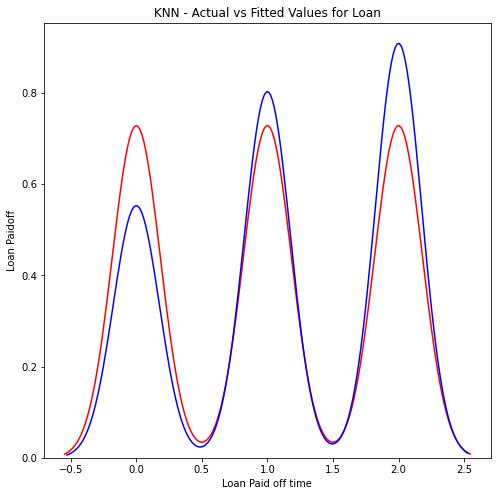

In [103]:
#KNN ACCURACY IN PREDICTING LOAN REPAYMENT TYPE 
plt.figure(figsize=(8,8))
ax = sns.distplot(y_over, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred_knn, hist=False, color='b', label='Fitted Value', ax=ax)  

plt.title('KNN - Actual vs Fitted Values for Loan')
plt.xlabel('Loan Paid off time')
plt.ylabel('Loan Paidoff')

plt.show();  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


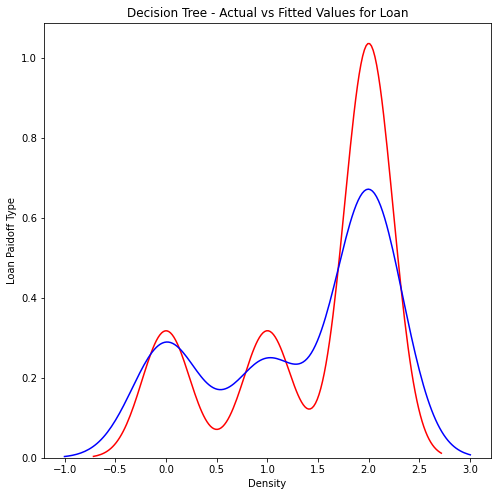

In [104]:
#Decision Tree Accuracy in predicting loan paidoff type 
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y2_train, hist=False, color='r', label='Actual Value')
sns.distplot(y2_prediction, hist=False, color='b', label='Fitted Value', ax=ax1)  

plt.title('Decision Tree - Actual vs Fitted Values for Loan')
plt.xlabel('Density')
plt.ylabel('Loan Paidoff Type')

plt.show()  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


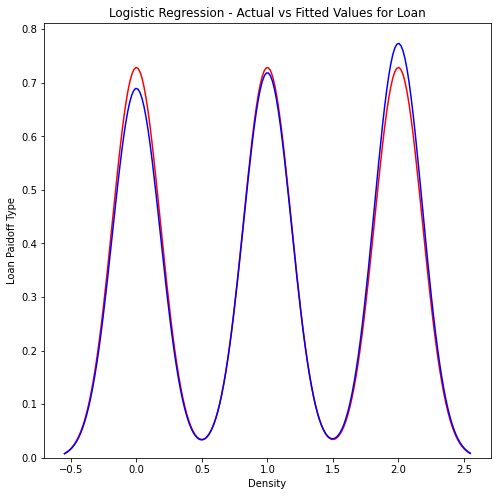

In [105]:
#LOGISTIC REGRESSION PLOT
plt.figure(figsize=(8,8))
ax2 = sns.distplot(y_over, hist=False, color='r', label='Actual Value')
sns.distplot(lr_prediction, hist=False, color='b', label='Fitted Value', ax=ax2)  

plt.title('Logistic Regression - Actual vs Fitted Values for Loan')
plt.xlabel('Density')
plt.ylabel('Loan Paidoff Type')

plt.show()  
##As visualised it shows the best fit - validating the high f1 and accuracy scores for the LR model.

In [106]:
#r2 metrics - KN
from sklearn.metrics import r2_score
print('KNN r2 Score:',r2_score(y_over, y_pred_knn)*100,'%');  
#64% r2 score for KNN 

KNN r2 Score: 53.51170568561873 %


In [107]:
#r2 score for DT
from sklearn.metrics import r2_score
print('DT r2 Score:',r2_score(y2_test, y2_prediction)*100,'%');   
#70.65% r2 score for DT - better fit as not overfitting the data 

DT r2 Score: 67.72300469483568 %


In [108]:
#r2 metrics - Logistic Regression
from sklearn.metrics import r2_score
print('LR r2 Score:',r2_score(y_over, lr_prediction)*100,'%');  
#85% r2 score for KNN 

LR r2 Score: 75.16722408026756 %


In [109]:
#CONCLUSIONS 

#Overall most people have PAIDOFF loans and the best ML technique is MLR Logistic Regression
#KNN had a good score as well with 90% accuracy and around 90% for all prediction f1-scores
#LR had the best fit according to the graph plotted of actual vs predicted
#In future other factors should be included that affect loan paidoff types such as:
#credit history
#emplyment history
#dependents
#marriage status

#Upon reviewing the dataset, as it is limited to the months Sept - Dec it is plausable to assume that this dataset is 
#student loan dataset. Especially given the evidence that the Principal amount (amount borrowed) only goes up to 1000.
#Additionally the dataset heavily focuses on the education level - therefore it is safe to assume this loan provider targets
#students currently studying / have graduated a few years ago.
